IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [3]:
fake['label'] = 0  # 0 for fake
true['label'] = 1  # 1 for real

Combining datasets

In [4]:
data = pd.concat([fake, true], ignore_index=True)
print("Dataset Shape:", data.shape)

Dataset Shape: (44898, 5)


In [5]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

Handling Missing Values & Removing Duplicates

In [6]:
print("\nMissing Values:\n", data.isnull().sum())
data = data.dropna()
data = data.drop_duplicates()
print("\nData Shape after removing duplicates:", data.shape)


Missing Values:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64

Data Shape after removing duplicates: (44689, 5)


Basic EDA


Label Distribution:


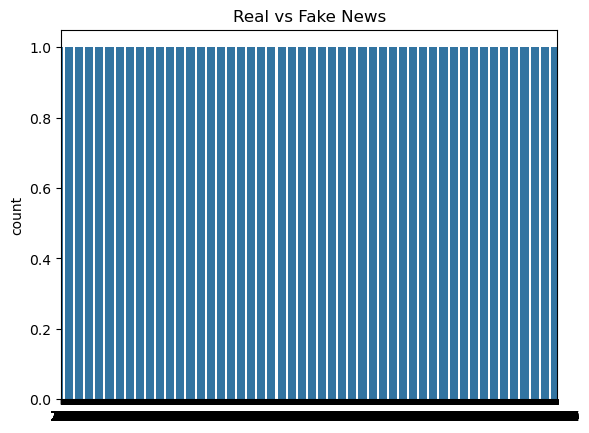

In [7]:
print("\nLabel Distribution:")
sns.countplot(data['label'])
plt.title('Real vs Fake News')
plt.show()

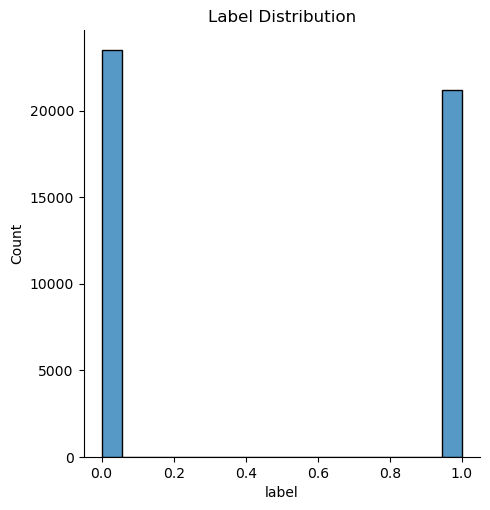

In [8]:
sns.displot(data['label'])
plt.title('Label Distribution')
plt.show()

Correlation Matrix

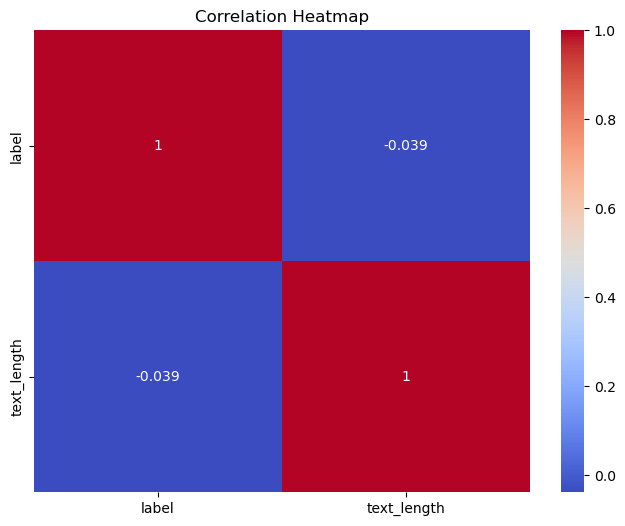

In [9]:
data['text_length'] = data['text'].apply(len)

plt.figure(figsize=(8,6))
sns.heatmap(data[['label', 'text_length']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Preprocessing Text

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_features = tfidf_vectorizer.fit_transform(data['text'])

In [11]:
y = data['label']

### Train Test Split

In [12]:
xv_train, xv_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

### Logistic Regression

In [13]:
lr = LogisticRegression()
lr.fit(xv_train, y_train)
pred_lr = lr.predict(xv_test)
acc_lr = accuracy_score(y_test, pred_lr)
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, pred_lr))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4652
           1       0.98      0.98      0.98      4286

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



### Decision Tree

In [14]:
dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)
pred_dt = dt.predict(xv_test)
acc_dt = accuracy_score(y_test, pred_dt)
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, pred_dt))


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4652
           1       1.00      0.99      0.99      4286

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



### Gradient Boost

In [ ]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(xv_train, y_train)
pred_gb = gb.predict(xv_test)
acc_gb = accuracy_score(y_test, pred_gb)
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, pred_gb))

### Comparing Models

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting']
accuracies = [acc_lr, acc_dt, acc_gb]

results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print("\nModel Comparison:\n", results)



Model Comparison:
                  Model  Accuracy
0    Gradient Boosting  0.994965
1        Decision Tree  0.994853
2  Logistic Regression  0.983330


C:\Users\Nitish\AppData\Local\Temp\ipykernel_40620\2157104407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


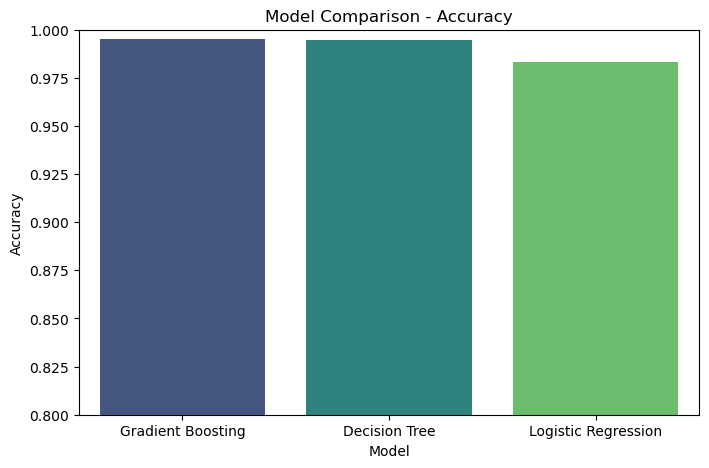

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

In [ ]:
def predict_news(text, model, vectorizer):
    vector = vectorizer.transform([text])
    result = model.predict(vector)
    return "Real News" if result[0] == 1 else "Fake News"


print(predict_news("NASA launches new satellite to study climate change", dt, tfidf_vectorizer))

Fake News
